In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

In [2]:
bowler_df = pd.read_csv("bowler.csv" ,encoding = "ISO-8859-1")

In [3]:
bowler_df=bowler_df.dropna()

In [4]:
bowler_df

,Name,Balls,Runs,Wkts,Ave,Econ
0,Arshdeep Singh,79,89,0,0.00,6.75
1,Ravichandran Ashwin,6303,5180,156,33.20,4.93
2,Jasprit Bumrah,4311,3315,140,23.67,4.61
3,Yuzvendra Chahal,3739,3283,121,27.13,5.26
4,Kuldeep Yadav,4855,4132,160,25.82,5.10
...,...,...,...,...,...,...
605,RT Lyons (SCOT),1093,901,20,45.05,4.94
606,N Madziva (ZIM),520,519,20,25.95,5.98
607,JO Ngoche (KENYA),878,569,20,28.45,3.88
608,KMA Paul (WI),740,737,20,36.85,5.97


In [5]:
bowler_df.iloc[1]

Name     Ravichandran Ashwin 
Balls                    6303
Runs                     5180
Wkts                      156
Ave                      33.2
Econ                     4.93
Name: 1, dtype: object

In [6]:
bowler_df.isnull().sum()

Name     0
Balls    0
Runs     0
Wkts     0
Ave      0
Econ     0
dtype: int64

In [7]:
bowler_df['Balls'].max(),bowler_df['Balls'].min(),bowler_df['Balls'].mean()

(18811, 79, 3197.583606557377)

In [8]:
bowler_df['Runs'].max(),bowler_df['Runs'].min(),bowler_df['Runs'].mean()

(13632, 89, 2488.240983606557)

In [9]:
bowler_df['Ave'].max(),bowler_df['Ave'].min(),bowler_df['Ave'].mean()

(71.36, 0.0, 33.04342622950819)

In [10]:
bowler_df['Wkts'].max(),bowler_df['Wkts'].min(),bowler_df['Wkts'].mean()

(534, 0, 79.67213114754098)

In [11]:
bowler_df['Econ'].max(),bowler_df['Econ'].min(),bowler_df['Econ'].mean()

(6.91, 3.09, 4.802754098360656)

In [12]:
bowler_df['Balls']/bowler_df['Wkts']

0            inf
1      40.403846
2      30.792857
3      30.900826
4      30.343750
         ...    
605    54.650000
606    26.000000
607    43.900000
608    37.000000
609    47.300000
Length: 610, dtype: float64

In [13]:
bowler_df['Ave'].max()

71.36

In [14]:
ave=round(bowler_df['Ave'].mean(),2)
ave

33.04

In [15]:
wkts=round(bowler_df['Wkts'].mean())
wkts

80

In [16]:
round(bowler_df['Econ'].mean(),2)

4.8

In [17]:
econ=round(bowler_df['Econ'].mean()+1)

In [18]:
#excellent_criteria = (bowler_df['Ave'] <= 24) & (bowler_df['Wkts'] >= 40) & (bowler_df['Econ'] <= 4.5)
#good_criteria = (bowler_df['Ave'] <= 30) & (bowler_df['Wkts'] >= 30) & (bowler_df['Econ'] <= 5.0)
#average_criteria = (bowler_df['Ave'] <= 35) & (bowler_df['Wkts'] >= 20) & (bowler_df['Econ'] <= 6.0)
#bad_criteria = (bowler_df['Ave'] <= 40) & (bowler_df['Wkts'] >= 15) & (bowler_df['Econ'] <= 6.0)

# Classify bowlers based on criteria
#bowler_df['Best_Bowler'] = 'Average'  # Default to "Average"
#bowler_df.loc[excellent_criteria, 'Best_Bowler'] = 'Excellent' 
#bowler_df.loc[good_criteria, 'Best_Bowler'] = 'Good'
#bowler_df.loc[bad_criteria, 'Best_Bowler'] = 'bad'

# Display the resulting DataFrame with categories
#bowler_df['Best_Bowler']
def select_best_bowler(row):
    ave = float(row['Ave'])
    wkts = int(row['Wkts'])
    econ = float(row['Econ'])
    
    if (ave <= 24) and (wkts >= 40) and (econ <= 4.5):
        return 'Excellent'
    elif (ave <= 30) and (wkts >= 30) and (econ <= 5.0):
        return 'Good'
    elif (ave <= 35) and (wkts >= 20) and (econ <= 6.0):
        return 'Average'
    else:
            return 'Not So Good'

# Create the target variable based on the criteria
bowler_df['Best_Bowler'] = bowler_df.apply(select_best_bowler, axis=1)


In [19]:
bowler_df['Best_Bowler'].value_counts()

Best_Bowler
Average        236
Not So Good    232
Good           119
Excellent       23
Name: count, dtype: int64

In [20]:
bowler_df= bowler_df.drop(labels=['Name'],axis=1)


In [21]:
from sklearn.model_selection import train_test_split
X = bowler_df[['Wkts','Ave','Econ']]
y = bowler_df['Best_Bowler']
X_train, X_test, y_train, y_test=train_test_split(X,y , test_size = 0.2 , random_state = 10)

In [22]:
bowler_df

,Balls,Runs,Wkts,Ave,Econ,Best_Bowler
0,79,89,0,0.00,6.75,Not So Good
1,6303,5180,156,33.20,4.93,Average
2,4311,3315,140,23.67,4.61,Good
3,3739,3283,121,27.13,5.26,Average
4,4855,4132,160,25.82,5.10,Average
...,...,...,...,...,...,...
605,1093,901,20,45.05,4.94,Not So Good
606,520,519,20,25.95,5.98,Average
607,878,569,20,28.45,3.88,Average
608,740,737,20,36.85,5.97,Not So Good


In [23]:
#Feature scalling
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

Logistic Regression 0.7213114754098361
Random Forest 0.9754098360655737
[103.0, 20.8, 3.6] are selected


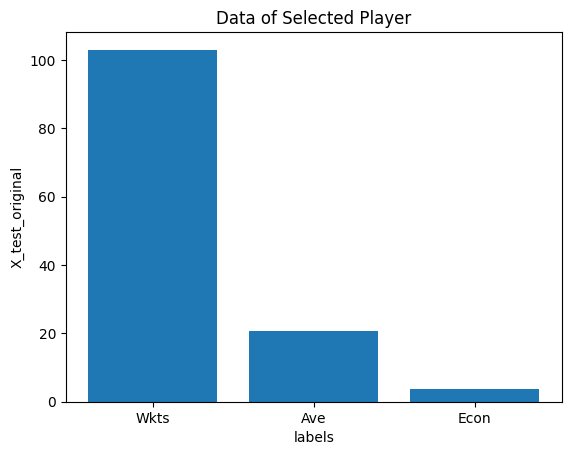

[381.0, 22.0, 3.9] are selected


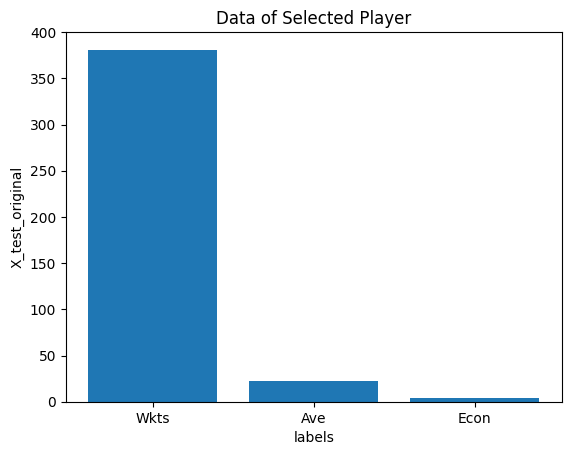

[147.0, 20.9, 4.3] are selected


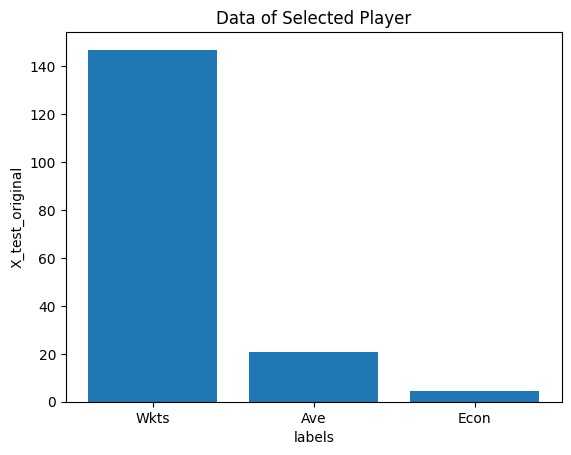

SVM 0.7459016393442623
Gradient Boosting 0.9754098360655737
[103.0, 20.8, 3.6] are selected


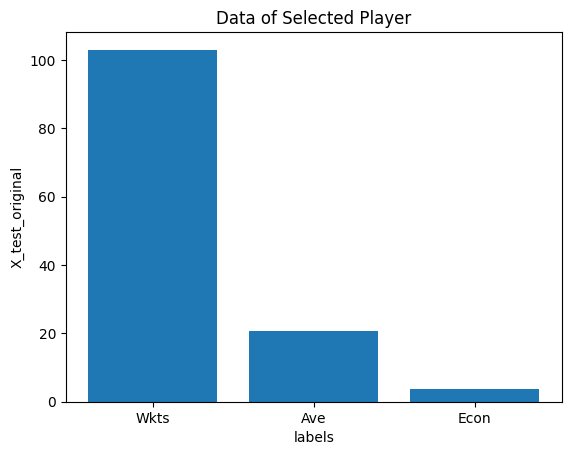

[381.0, 22.0, 3.9] are selected


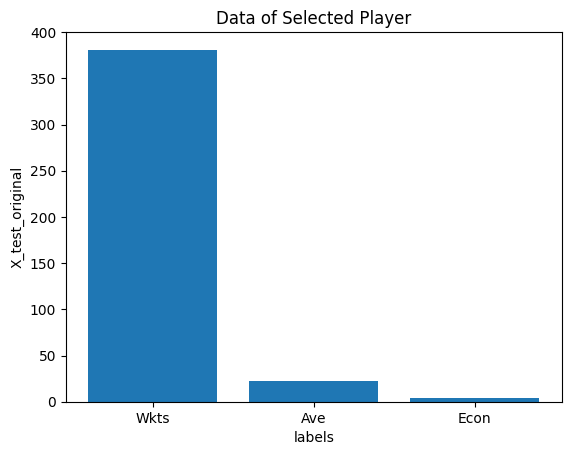

[63.0, 23.2, 3.6] are selected


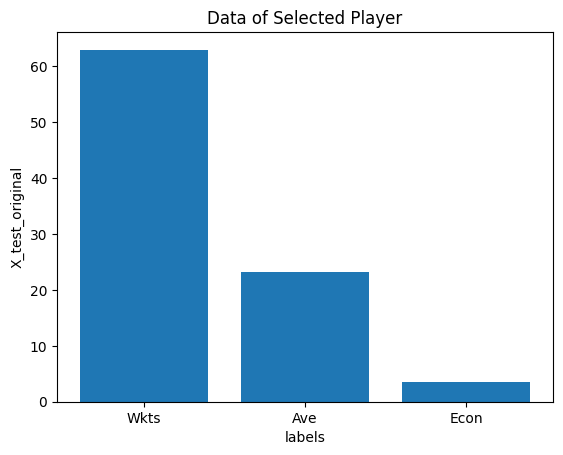

[147.0, 20.9, 4.3] are selected


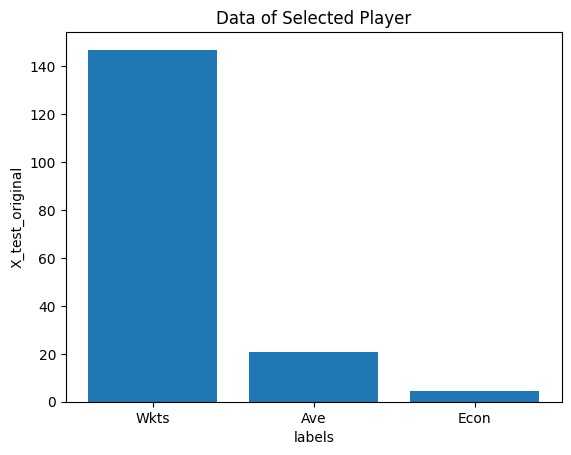

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
labels=['Wkts','Ave','Econ']
# Create models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='linear'),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(model_name,accuracy)
    #report=classification_report(y_test, y_pred)
    #print(report)
    for i in range(len(y_pred)):
        #for pred_name,  in y_pred.items():
        if y_pred[i]=='Excellent':
            #X_test_original_list=[]
            X_test_original = mms.inverse_transform(X_test_scaled[[i]]).flatten().astype(float)
            X_test_original = [round(val, 1) for val in X_test_original]
            #X_test_original_list=X_test_original_list.append(X_test_original)
            print(X_test_original,'are selected')
            plt.bar(labels,X_test_original)
            plt.xlabel('labels')
            plt.ylabel('X_test_original')
            plt.title('Data of Selected Player')
            plt.show()
        else:
            pass
            #print('you are not selected')
    

In [25]:
dump(model,'./../models/bow_model.joblib')

['./../models/bow_model.joblib']

In [26]:
import matplotlib.pyplot as plt
labels=['Logistic Regression','Random Forest','SVM']

<BarContainer object of 3 artists>

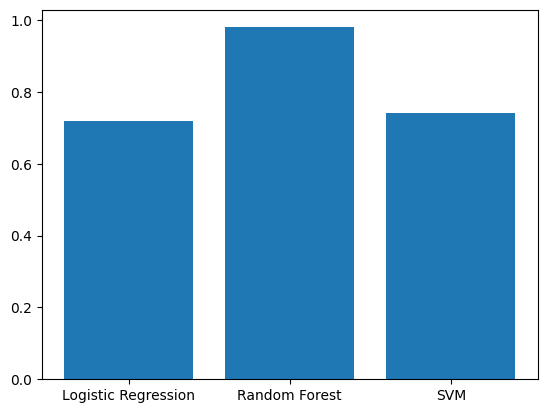

In [27]:
plt.bar(labels,[0.72,0.98,0.74])

In [28]:
len(X_test_original)

3